Variational Hybrid quantum-classical Naïve Bayes Classifier

In [11]:
import pandas as pd

train = pd.read_csv(r'C:\Users\kamata3\Work\QML\titanic\train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
survivors = train[train.Survived.eq(1)]
# surv2 = train[train['Survived']==1]
print(f'Number of survior:{len(survivors)} ')
print('probability of surviving :{:.3f}'.format(len(survivors)/len(train)))

Number of survior:342 
probability of surviving :0.384


In [23]:
SecondClassPassangers = train[train.Pclass.eq(2)]
print(f'P(Survived|second_class) : {len(SecondClassPassangers[SecondClassPassangers.Survived.eq(1)])/len(SecondClassPassangers)}')

P(Survived|second_class) : 0.47282608695652173


In [25]:
female = train[train.Sex.eq('female')]
print(f'P(Survived|female) : {len(female[female.Survived.eq(1)])/len(female)}')

P(Survived|female) : 0.7420382165605095


In [32]:
female_survied = female[female.Survived.eq(1)]
survived_female_secondClass = female_survied[female_survied.Pclass.eq(2)]
female_secondClass = female[female.Pclass.eq(2)]
print(f'P(Survived|(female+secondClassPassanger) :{len(survived_female_secondClass)/len(female_secondClass)}')

P(Survived|(female+secondClassPassanger) :0.9210526315789473


Calculating the posterior probability
P(survived|secondClass, female) = P(survived) *P(secondClass|survived) /P(secondClass) *P(female|survived) /P(female)

In [45]:
P_secClassSurv = len(survivors[survivors.Pclass.eq(2)])/len(survivors)
P_secClass = len(train[train.Pclass.eq(2)])/len(train)
print('P(secondClass|survived)/P(secondClass) : {:.3f}'.format(P_secClassSurv/P_secClass ))
print('informativeness: {:.3f}'.format(P_secClassSurv/P_secClass-1 ) )

P_femSurv = len(survivors[survivors.Sex.eq('female')])/len(survivors)
P_female = len(train[train.Sex.eq('female')])/len(train)
print('P(female|survived)/P(female) : {:.3f}'.format(P_femSurv/P_female ))
print('informativeness 2: {:.3f}'.format(P_femSurv/P_female-1 ) )

P_surv = len(train[train.Survived.eq(1)])/len(train)
P_surv_secClassFemale = P_surv* P_secClassSurv/P_secClass * P_femSurv/P_female
print('P(survived|secondClass, female): {:.3f}'.format(P_surv_secClassFemale))



P(secondClass|survived)/P(secondClass) : 1.232
informativeness: 0.232
P(female|survived)/P(female) : 1.933
informativeness 2: 0.933
P(survived|secondClass, female): 0.914


Gaussian Naïve Bayes

<AxesSubplot:>

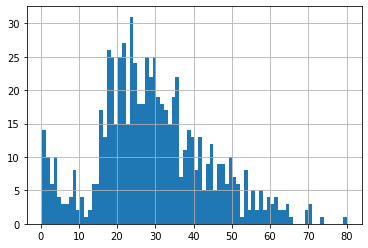

In [50]:
train.Age.hist(bins=80)

In [63]:
import numpy as np
def P_density(x, mean, std):
    return 1/(std*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mean)/std)**2)


P(survived| Age=29) =  P(Age=29)* P(Age=29| survived)/P(Age=29)


In [73]:
mean_age = train['Age'].mean()
std_age = train['Age'].std()
P_age29 = P_density(29,mean_age,std_age)

mean_age_surv = survivors['Age'].mean()
std_age_surv = survivors['Age'].std()
print('Average age {:.3f} and std {:.3f}'.format(mean_age_surv,std_age_surv))
P_survived_age29  = P_density(29, mean_age_surv, std_age_surv)

P_surv = len(survivors)/len(train)
modifier = P_survived_age29/P_age29
print('modifier: ',modifier)
print('informativeness: {:.3f}'.format(abs(modifier-1)))


Average age 28.344 and std 14.951
modifier:  0.9717992948773554
informativeness: 0.028


In [74]:
# Calculating informativenesses of other ages

mean_age = train['Age'].mean()
std_age = train['Age'].std()
P_age70 = P_density(70,mean_age,std_age)
P_age5 = P_density(5,mean_age,std_age)

mean_age_surv = survivors['Age'].mean()
std_age_surv = survivors['Age'].std()
print('Average age {:.3f} and std {:.3f}'.format(mean_age_surv,std_age_surv))
P_survived_age70  = P_density(70, mean_age_surv, std_age_surv)
P_survived_age5  = P_density(5, mean_age_surv, std_age_surv)

P_surv = len(survivors)/len(train)
modifier70 = P_survived_age70/P_age70
modifier5 = P_survived_age5/P_age5
print('modifier: ',modifier)
print('informativeness 70age: {:.3f}'.format(abs(modifier70-1)))
print('informativeness 5age: {:.3f}'.format(abs(modifier5-1)))

Average age 28.344 and std 14.951
modifier:  0.9717992948773554
informativeness 70age: 0.060
informativeness 5age: 0.219
